In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [4]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [9]:
song_data = pd.read_csv('song_data.csv')
song_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [10]:
song_info = pd.read_csv('song_info.csv')
song_info.head()

,song_name,artist_name,album_names,playlist
0,Boulevard of Broken Dreams,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
1,In The End,Linkin Park,Hybrid Theory,00s Rock Anthems
2,Seven Nation Army,The White Stripes,Elephant,00s Rock Anthems
3,By The Way,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
4,How You Remind Me,Nickelback,Silver Side Up,00s Rock Anthems


In [104]:
music = song_info.merge(song_data, on=["song_name"], how='inner')
music.head(15)

,song_name,artist_name,album_names,playlist,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems,73,262333,0.00552,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,Boulevard of Broken Dreams,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems,71,261266,0.00394,0.490,0.679,0.000015,8,0.0383,-3.680,1,0.0309,167.046,4,0.506
2,Boulevard of Broken Dreams,Green Day,Boulevard Of Broken Dreams,Life Sucks,73,262333,0.00552,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
3,Boulevard of Broken Dreams,Green Day,Boulevard Of Broken Dreams,Life Sucks,71,261266,0.00394,0.490,0.679,0.000015,8,0.0383,-3.680,1,0.0309,167.046,4,0.506
4,In The End,Linkin Park,Hybrid Theory,00s Rock Anthems,66,216933,0.01030,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
5,Seven Nation Army,The White Stripes,Elephant,00s Rock Anthems,76,231733,0.00817,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
6,Seven Nation Army,The White Stripes,Elephant,00s Rock Anthems,64,172919,0.89100,0.690,0.283,0.000386,2,0.1110,-7.309,1,0.0294,104.348,4,0.350
7,Seven Nation Army,The White Stripes,Elephant,00s Rock Anthems,81,231920,0.00666,0.745,0.466,0.350000,4,0.2720,-7.620,0,0.0864,123.889,4,0.303
8,Seven Nation Army,The White Stripes,Elephant,00s Rock Anthems,81,231920,0.00666,0.745,0.466,0.350000,4,0.2720,-7.620,0,0.0864,123.889,4,0.303
9,Seven Nation Army,The White Stripes,Elephant,00s Rock Anthems,19,231800,0.00576,0.750,0.462,0.545000,0,0.3070,-7.664,1,0.0779,123.865,4,0.309


In [37]:
ratings_songs = music.groupby('song_name').agg(['mean'])['song_popularity'].head()
ratings_songs.head()

,mean
song_name,
"""40"" - Live Version 1983",1.0
"""45""",48.0
"""99""",67.0
"""Heroes"" - Single Version; 2014 Remastered Version",58.0
#CaixaGang,10.0


In [76]:
ratings_songs = music.groupby(['song_name']).mean().sort_values(by='song_popularity', ascending=False)
ratings_songs.head(5)

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_name,,,,,,,,,,,,,,
I Love It (& Lil Pump),99.000000,127946.0,0.011400,0.901000,0.522000,0.000000,2.000000,0.259000,-8.304,1.0,0.330000,104.053000,4.0,0.329000
Happier,98.285714,213322.0,0.240286,0.663429,0.733857,0.000000,4.285714,0.162429,-3.407,1.0,0.042857,98.554571,4.0,0.608857
Eastside (with Halsey & Khalid),98.000000,173799.0,0.555000,0.560000,0.680000,0.000000,6.000000,0.116000,-7.648,0.0,0.321000,89.391000,4.0,0.319000
"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",98.000000,212500.0,0.153000,0.841000,0.798000,0.000003,1.000000,0.061800,-4.206,0.0,0.229000,95.948000,4.0,0.591000
Promises (with Sam Smith),98.000000,213309.0,0.011900,0.781000,0.768000,0.000005,11.000000,0.325000,-5.991,1.0,0.039400,123.070000,4.0,0.486000


In [83]:
ratings_songs_new = music.pivot_table(index=['song_name'], values = 'song_popularity', aggfunc='mean')
ratings_songs_sorted = ratings_songs_new.sort_values(by = ['song_popularity'], ascending = False)
ratings_songs_sorted_new=ratings_songs_sorted.reset_index()
top15 = ratings_songs_sorted_new.head(15)
top15

,song_name,song_popularity
0,I Love It (& Lil Pump),99.000000
1,Happier,98.285714
2,Eastside (with Halsey & Khalid),98.000000
3,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",98.000000
4,Promises (with Sam Smith),98.000000
5,Falling Down,97.000000
6,In My Mind,97.000000
7,SICKO MODE,97.000000
8,FEFE (feat. Nicki Minaj & Murda Beatz),96.000000
9,Be Alright,96.000000


Text(0.5, 1.0, 'Top 15 songs')

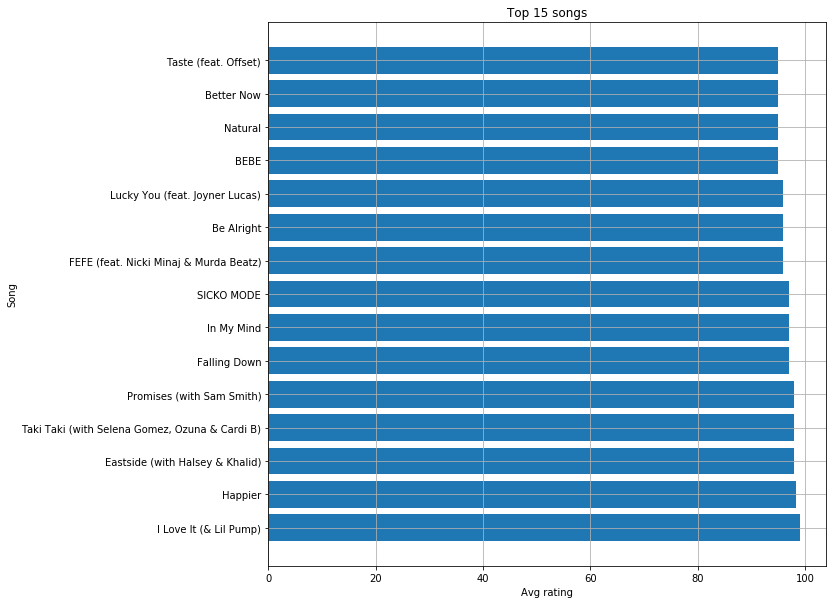

In [84]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,10
plt.barh(top15['song_name'], top15['song_popularity'])
plt.grid()
plt.xlabel('Avg rating')
plt.ylabel('Song')
plt.title('Top 15 songs')

In [85]:
ratings_songs_sorted_new2 = ratings_songs_sorted.head(15)
ratings_songs_sorted_new2

,song_popularity
song_name,
I Love It (& Lil Pump),99.000000
Happier,98.285714
Eastside (with Halsey & Khalid),98.000000
"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",98.000000
Promises (with Sam Smith),98.000000
Falling Down,97.000000
In My Mind,97.000000
SICKO MODE,97.000000
FEFE (feat. Nicki Minaj & Murda Beatz),96.000000


In [86]:
ratings_songs_sorted_new2.style.bar()

,song_popularity
song_name,
I Love It (& Lil Pump),99
Happier,98.2857
Eastside (with Halsey & Khalid),98
"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",98
Promises (with Sam Smith),98
Falling Down,97
In My Mind,97
SICKO MODE,97
FEFE (feat. Nicki Minaj & Murda Beatz),96


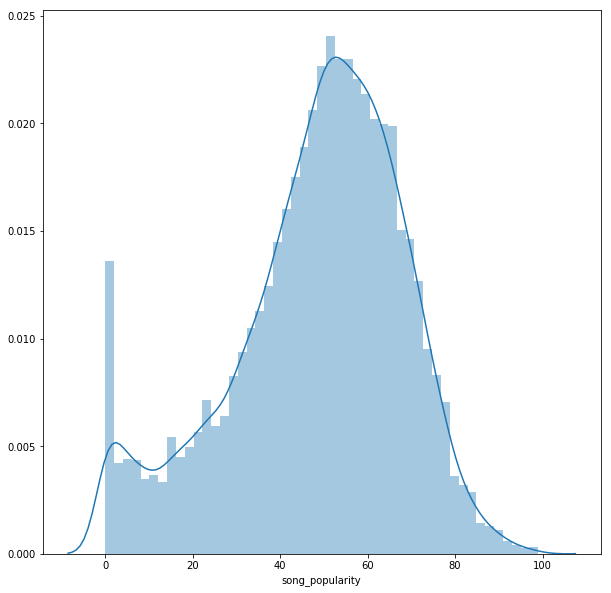

In [87]:
sns.distplot(ratings_songs.song_popularity)

In [91]:
ratings_songs_new = ratings_songs.head(15)

In [92]:
trace0 = go.Bar(
    x=ratings_songs_new.index,
    y=ratings_songs_new.acousticness,
    name='Acousticness',
    orientation = 'v'
)

trace1 = go.Bar(
    x=ratings_songs_new.index,
    y=ratings_songs_new.danceability,
    name='Danceability',
    orientation = 'v'
)

data = [trace0, trace1]
layout = {'title': 'Top15 songs Data'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

In [96]:
ratings_songs_new = ratings_songs_new.reset_index()
ratings_songs_new

,index,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0,I Love It (& Lil Pump),99.000000,127946.0,0.011400,0.901000,0.522000,0.000000,2.000000,0.259000,-8.304,1.0,0.330000,104.053000,4.0,0.329000
1,1,Happier,98.285714,213322.0,0.240286,0.663429,0.733857,0.000000,4.285714,0.162429,-3.407,1.0,0.042857,98.554571,4.0,0.608857
2,2,Eastside (with Halsey & Khalid),98.000000,173799.0,0.555000,0.560000,0.680000,0.000000,6.000000,0.116000,-7.648,0.0,0.321000,89.391000,4.0,0.319000
3,3,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",98.000000,212500.0,0.153000,0.841000,0.798000,0.000003,1.000000,0.061800,-4.206,0.0,0.229000,95.948000,4.0,0.591000
4,4,Promises (with Sam Smith),98.000000,213309.0,0.011900,0.781000,0.768000,0.000005,11.000000,0.325000,-5.991,1.0,0.039400,123.070000,4.0,0.486000
5,5,Falling Down,97.000000,196400.0,0.017500,0.669000,0.574000,0.002940,4.000000,0.146000,-6.442,0.0,0.028600,120.013000,4.0,0.273000
6,6,In My Mind,97.000000,184560.0,0.176000,0.694000,0.770000,0.000011,6.000000,0.118000,-5.335,1.0,0.149000,125.905000,4.0,0.163000
7,7,SICKO MODE,97.000000,312820.0,0.005130,0.834000,0.730000,0.000000,8.000000,0.124000,-3.714,1.0,0.222000,155.008000,4.0,0.446000
8,8,FEFE (feat. Nicki Minaj & Murda Beatz),96.000000,179404.0,0.088000,0.931000,0.387000,0.000000,1.000000,0.136000,-9.127,1.0,0.412000,125.978000,4.0,0.376000
9,9,Be Alright,96.000000,196373.0,0.697000,0.553000,0.586000,0.000000,11.000000,0.081300,-6.319,1.0,0.036200,126.684000,4.0,0.443000


In [107]:
songs_list = ratings_songs_new.song_name.unique()

In [108]:
data = []

for every_song_name in songs_list:
    data.append(
        go.Box(y=music[music.song_name==every_song_name].song_popularity, 
               name=every_song_name)
    )
iplot(data, show_link = False)